In [151]:
#packages
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
#****INPUTS*****

#Place directory of file below
directory = '11H_Fall_2020_grades.csv'


#curve function
I=0
b=.75

def f(x):
    return 100*((1-I)*(x/100)**b + I)

In [172]:
#Special Ditribution Function
#'v' : array: mu center of normal
#'s' : float: sigma standard deviation
def pdf(x,v,s):
    dist = 0
    num = len(v)
    for i in v:
        dist = dist + 1/(np.sqrt(2*np.pi)*s)*np.exp(-.5*((x-i)/s)**2)
    return dist/num

In [189]:
#Read CSV file into dataframe
df = pd.read_csv(directory, delimiter =',')

#Width of row (column number)
N = df.shape[1]

#number of assignments to ignore at end
d = 0
#number of assignemnts to go back to
d1 = 6
#Columns with grades  
D = d*4 +2
D1 = d1*4 +2
n = range(N-D1+1,N-D+1,4)
n1 = range(N-D1+2,N-D+2,4)

#Drop student by row index
df = df.drop(23)
df = df.drop(8)
df = df.drop(6)

#weights for each assignment
weights = pd.Series([1 for i in n], dtype=float)
factor = 1.4
weights[3,5]=factor
weights

0    1.0
1    1.0
2    1.0
3    1.4
4    1.0
5    1.4
dtype: float64

In [190]:
#Array of Student Names
Name = df['Name']
Names = Name.to_numpy()

#Use to replace with fake names for presentation
randomize = False

if randomize == True:
    from faker import Faker
    names = []
    for i in range(30):
        names.append(Faker().name())
    Names = names

#Matrix of Grades
gr = df.iloc[:,n].fillna(0)

#total possible points
tot = df.iloc[:,n1]

#print(weights.to_numpy())
tot_points = tot.iloc[0].to_numpy().astype(float).dot(weights.to_numpy())

#Applying the curve to exam
#gr['Exam Set 1 '] = f(gr['Exam Set 1 '])
gr['Final Exam (III)'] = gr['Final Exam (III)']+5
gr['Set 5 Exam'] = gr['Set 5 Exam']+4
gr

,Set 5 Exam,Trig Assignments,Derivative Homework,Final Exam (I-II),Exam 8,Final Exam (III)
0,75.0,10.0,5.0,69.0,98.00,33.25
1,73.0,10.0,5.0,60.0,88.00,27.20
2,80.0,10.0,5.0,69.0,73.00,36.25
3,80.0,10.0,5.0,66.0,86.75,38.25
4,76.0,10.0,5.0,75.0,78.00,29.10
5,85.0,8.0,5.0,72.0,99.00,35.25
7,72.0,10.0,5.0,63.0,84.00,31.60
9,70.0,5.0,0.0,54.0,83.00,16.05
10,80.0,8.0,5.0,75.0,97.00,34.00
11,68.0,0.0,5.0,48.0,85.50,23.60


In [191]:
(tot.iloc[0,3]+tot.iloc[0,5])*(0.04)

4.44

In [192]:
FinalExam = gr.iloc[:,3]+gr.iloc[:,5]
FinalExam = FinalExam/(tot.iloc[0,3]+tot.iloc[0,5])
FinalExam.mean()

0.8660994327660994

In [193]:
#Computing the Averages:
Averages = np.dot(gr,weights)/tot_points
Result = pd.DataFrame(data = np.array([Names,Averages]).transpose(), columns = ['Name', 'Grade'] )
Result['Curved']=f(Result['Grade']*100)

In [194]:
print('Class Average:', np.mean(Averages))
print('Class Deviation:', np.std(Averages))
print('Highest Score:',np.max(Averages),'by', Result['Name'][np.argmax(Averages)])
print('Lowest Score:',np.min(Averages),'by', Result['Name'][np.argmin(Averages)])

Result

Class Average: 0.8735125053507002
Class Deviation: 0.12571238080308988
Highest Score: 1.0820033021463953 by Gavi Kigner
Lowest Score: 0.5350027517886627 by Harry Orlinsky


,Name,Grade,Curved
0,Aiden Samet,0.911255,93.267402
1,Andy Rosenberg,0.820253,86.190805
2,Avery Klahr,0.867777,89.909573
3,Chanan Schreiber,0.901761,92.537687
4,Daniel Brauner,0.866098,89.779103
5,Daniel Grin,0.955283,96.627153
6,Efraim Kooijmans,0.835003,87.350608
7,Eitan Laub,0.704651,76.909561
8,Eitan Nissel,0.942763,95.675739
9,Eliyah Avishur,0.711998,77.510223


In [195]:
Result.sort_values(by=['Grade'], ascending = False, ignore_index = True)

,Name,Grade,Curved
0,Gavi Kigner,1.082003,106.089265
1,Shimshy Gordon,1.047331,103.529209
2,Yoni Zelkowitz,1.04634,103.455756
3,Joseph Mann,1.012933,100.968446
4,Nachi Scheiner,0.990479,99.285058
5,Yosef Kryzman,0.973363,97.995474
6,Tzvi Naor,0.960209,97.00059
7,Daniel Grin,0.955283,96.627153
8,Eitan Nissel,0.942763,95.675739
9,Ezra Lebowitz,0.93781,95.298485


5


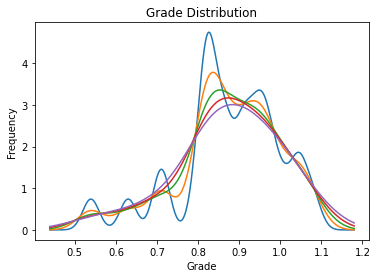

In [166]:
X = np.linspace(np.min(Averages)-.1,np.max(Averages)+.1,1000)
ds = .01
A = .02
B = .07
iter = int((B-A)/ds)
print(iter)
for S in np.linspace(A,B,iter):
    Y = pdf(X,Averages,S)
    plt.plot(X,Y)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade Distribution')
plt.show()

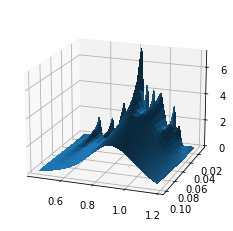

In [167]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
A = .01
B = .1

X = np.linspace(np.min(Averages)-.1,np.max(Averages)+.1,1000)
Y = np.linspace(A,B,10)
X, Y = np.meshgrid(X, Y)
Z = pdf(X,Averages,Y)

ax.view_init(elev=18, azim=110)
ax.invert_xaxis()
surf = ax.plot_surface(X, Y, Z,linewidth=0, antialiased=False)
plt.show()

In [3]:
import numpy as np
from faker import Faker
names = []
for i in range(30):
    names.append(Faker().name())
names

['Chase Roberts',
 'Kaitlyn Sweeney',
 'Alexis Jennings',
 'Sara Soto',
 'Eric Moore',
 'Laura Foster',
 'Stacey Sharp',
 'Donald Reynolds',
 'Mark Phelps',
 'Michael Cantrell',
 'Tracy Harris',
 'William Jennings',
 'Ann Nelson',
 'Christopher Bruce',
 'David Oliver',
 'Brandon Flores',
 'Bryan Thompson',
 'Jasmin Rivera',
 'Lindsey Mckenzie',
 'Ms. Nicole Craig',
 'Aaron Reed',
 'Laura Lozano',
 'Lisa Vega',
 'Miguel Brown',
 'Matthew Ellison',
 'Ashley Frazier',
 'Ruth House',
 'Kimberly Prince',
 'Donald Huang',
 'Amanda Gentry']

In [4]:
file = open("FN.csv", "w")

In [11]:
np.savetxt("fn.csv", names, fmt="%s")

In [9]:
names

array(['Chase Roberts', 'Kaitlyn Sweeney', 'Alexis Jennings', 'Sara Soto',
       'Eric Moore', 'Laura Foster', 'Stacey Sharp', 'Donald Reynolds',
       'Mark Phelps', 'Michael Cantrell', 'Tracy Harris',
       'William Jennings', 'Ann Nelson', 'Christopher Bruce',
       'David Oliver', 'Brandon Flores', 'Bryan Thompson',
       'Jasmin Rivera', 'Lindsey Mckenzie', 'Ms. Nicole Craig',
       'Aaron Reed', 'Laura Lozano', 'Lisa Vega', 'Miguel Brown',
       'Matthew Ellison', 'Ashley Frazier', 'Ruth House',
       'Kimberly Prince', 'Donald Huang', 'Amanda Gentry'], dtype='<U17')